In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from networkx.algorithms.connectivity import local_edge_connectivity
import networkx as nx
import seaborn as sns    
import scipy.stats as stats
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','anthill','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4']
#fruit_fly_names = ['fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4','fruit_fly_int_2','fruit_fly_int_3','fruit_fly_int_1','fruit_fly_int_4'] #,tree
#color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
#              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
#              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'
#               ,'fruit_fly_int_2':'purple','fruit_fly_int_3':'pink',
#              'fruit_fly_int_1':'deeppink','fruit_fly_int_4':'plum'}

In [13]:
df_dict = {'name':[],
           'degree_distribution_mean': [],
 'degree_distribution_std': [],
 '2nd_order_degree_mean': [],
 '2nd_order_degree_std': [],
 'network_diameter': [],
  'average_shortest_path_length':[],
 'average_clustering': [],
 'transitivity': [],
   'N_number_of_nodes':[],
    'log_N':[] ,
    'network_diameter/log(N)':[],
          'max_degree':[],
           'network_diameter_tree_std':[],
           'network_diameter_tree_mean':[],
           'is_not_tree':[]
          }

path_save = '2. link_degree_betw_results/'
link_degree_name_dict = {}
link_betw_pathid_name_dict = {}
tree_dict = {}
cycle_dict = {}
degree_dict = {}
        
link_network_results = {}
for name in name_list:
    print('******',name)
    network_measures_dict = {}
    path_source = '1. network_measures_results/'
    infile = open(path_source+ name + "_network_measures_dict.pkl",'rb')
    network_measures_dict =  pickle.load(infile)
    network_measures_dict['name'] = name
    for key in network_measures_dict.keys():
        if key != 'link_degree_dict' and key!= 'betw_dict' and key !=  'link_degree_dist':
            df_dict[key].append(network_measures_dict[key])
    
    path_source = '../1. data/3. final_data/'
    link_paths = pd.read_csv(path_source +name + '.paths.csv',index_col=[0])
    path_bodyid_list = link_paths[['path_id','bodyId_pre','bodyId_post']].drop_duplicates().values.tolist()
    G = nx.Graph()
    path_bodyid_dict = {}  
    bodyid_path_dict = {}
    for path_bodyid in path_bodyid_list:
        path_bodyid_dict[path_bodyid[0]] =  (path_bodyid[1],path_bodyid[2])
        bodyid_path_dict[(path_bodyid[1],path_bodyid[2])] = path_bodyid[0]
        bodyid_path_dict[(path_bodyid[2],path_bodyid[1])] = path_bodyid[0] 
    edge_list = []
    for path_id,bodyid_edge in path_bodyid_dict.items():
        edge_list.append([bodyid_edge[0],bodyid_edge[1]])
        G.add_edge(bodyid_edge[0],bodyid_edge[1])
    degree_dict[name] =dict(G.degree)
    #df_csv = pd.DataFrame(edge_list,columns = ['node_pre','node_post'])
    #df_csv.to_csv(name + '.csv')

****** human_neuron
****** rat_neuron
****** monkey_neuron
****** zebrafish_neuron
****** vascular_2
****** vascular_3
****** vascular_1
****** mitochondrial
****** root_1
****** root_2
****** anthill
****** fruit_fly_2
****** fruit_fly_3
****** fruit_fly_1
****** fruit_fly_4


# Network properties 

In [5]:
df = pd.read_csv('network_measures.csv',index_col=[0])
df

,name,degree_distribution_mean,degree_distribution_std,2nd_order_degree_mean,2nd_order_degree_std,network_diameter,average_shortest_path_length,average_clustering,transitivity,N_number_of_nodes,log_N,network_diameter/log(N),max_degree,network_diameter_tree_std,network_diameter_tree_mean,is_not_tree,z-score_n_dia
7,mitochondrial,2.39,0.95,6.26,2.55,11,5.552459,0.043716,0.069767,61,4.110874,2.675830,4,3.609363,20.15,1,8.208113
2,monkey_neuron,1.99,1.11,5.17,2.97,20,9.777964,0.000000,0.000000,155,5.043425,3.965559,8,6.851825,37.45,0,15.229977
5,vascular_3,2.97,0.22,8.57,1.05,22,10.383564,0.029151,0.029690,789,6.670766,3.297972,4,14.313979,89.10,1,8.996164
1,rat_neuron,1.99,1.00,4.96,2.27,21,10.455391,0.000000,0.000000,186,5.225747,4.018564,3,7.851115,40.60,0,15.818663
4,vascular_2,2.99,0.29,8.76,1.18,22,10.719586,0.022622,0.021898,862,6.759255,3.254796,4,12.769005,91.95,1,14.798969
6,vascular_1,3.02,0.26,8.91,1.05,27,12.545007,0.019683,0.020000,1558,7.351158,3.672891,5,15.844242,119.40,1,18.658504
9,root_2,2.00,1.12,5.23,2.73,35,16.339522,0.000000,0.000000,412,6.021023,5.812965,9,8.932385,59.75,0,31.228914
3,zebrafish_neuron,1.99,1.04,5.05,2.45,46,16.757414,0.000000,0.000000,308,5.730100,8.027783,7,7.835815,50.00,0,32.147139
0,human_neuron,2.00,1.04,5.06,2.53,49,21.227111,0.000000,0.000000,632,6.448889,7.598208,9,7.217340,74.90,0,43.155034
8,root_1,2.00,1.08,5.15,2.41,95,40.117043,0.000000,0.000000,987,6.894670,13.778759,5,12.814445,97.70,0,84.062272


human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
anthill
fruit_fly_2
fruit_fly_3
fruit_fly_1
fruit_fly_4


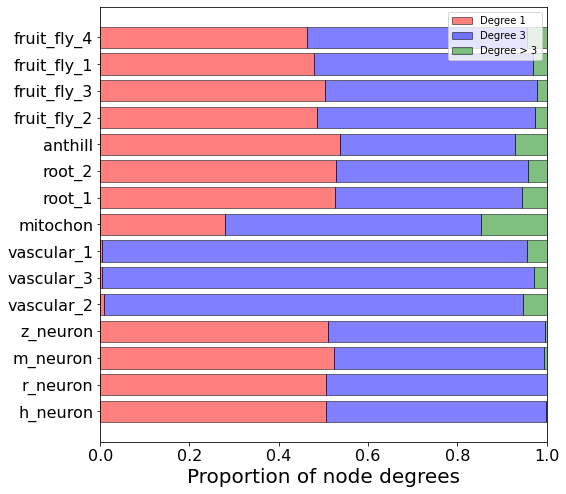

In [22]:

x = []
y = []
y1 = []
y2 = []
y_1_2_sum = []
y3 = []
name_change_dict = {'zebrafish_neuron':'z_neuron','human_neuron':'h_neuron','monkey_neuron':'m_neuron','mitochondrial':'mitochon','rat_neuron':'r_neuron'}
for name in degree_dict.keys():
    print(name)
    all_values = list(degree_dict[name].values())
    all_keys = list(set(degree_dict[name].values()))
    value_counts_dict = {}
    for key in [1,3]:
         value_counts_dict[key] = all_values.count(key)/len(all_values)
    ratio_1 =  np.round(value_counts_dict[1],3)
    ratio_3 = np.round(value_counts_dict[3],3)
    if name in name_change_dict.keys():
        x.append(name_change_dict[name])
    else:
        x.append(name)
    y1.append(ratio_1)
    y2.append(ratio_3)
    y_1_2_sum.append(ratio_1 + ratio_3)
    y3.append(1-ratio_1 - ratio_3)
    
plt.figure(figsize=(8,8))
plt.barh(x, y1, color='red',orientation='horizontal',label='Degree 1',alpha=0.5,edgecolor='black')
plt.barh(x, y2, left=y1, color='blue',orientation='horizontal',label='Degree 3',alpha=0.5,edgecolor='black')
plt.barh(x,y3, left=y_1_2_sum , color='green',orientation='horizontal',label='Degree > 3',alpha=0.5,edgecolor='black')
#plt.bar( value_counts_dict.keys(), value_counts_dict.values(),label='Ratio of 1-3 and 3-3 connections: ' +str(ratio),edgecolor='black',alpha=0.7)
#plt.title('Proportion of node degrees in the network')
#plt.yscale('log')
plt.xlabel("Proportion of node degrees")
plt.legend(loc="upper right")
plt.xlim(0,1)
#plt.legend()
plt.savefig('abstract_network_deg.pdf', format='pdf',dpi=1200)

In [12]:
degree_dict[name]

{}

mitochondrial
monkey_neuron
vascular_3
rat_neuron
vascular_2
vascular_1
root_2
zebrafish_neuron
human_neuron
root_1
fruit_fly_4
fruit_fly_2
fruit_fly_1
anthill
fruit_fly_3
mitochondrial
monkey_neuron
vascular_3
rat_neuron
vascular_2
vascular_1
root_2
zebrafish_neuron
human_neuron
root_1
fruit_fly_4
fruit_fly_2
fruit_fly_1
anthill
fruit_fly_3


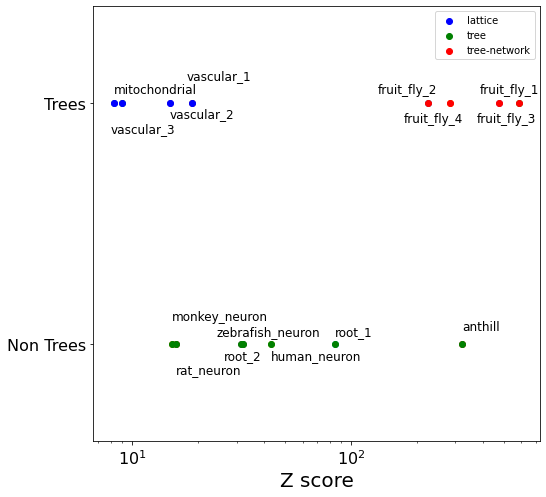

In [126]:
plt.figure(figsize=(8,8))
for name in df['name']:
    print(name)
    df_row = df[df['name'] == name]
    
    x = df_row['z-score_n_dia']
    y = df_row['is_not_tree']
    if y.values[0] > 0:
        y = 0.25
    else:
        y = 0
    plt.scatter(x, y)
    #plt.text((x+0.005),(y + 0.005), name, fontsize=12)
    if name == 'monkey_neuron':
        plt.text(x * 1  , y   + 0.025 , name, fontsize=12)
    elif name == 'rat_neuron':
        plt.text(x * 1  , y   - 0.03 , name, fontsize=12)
    elif name == 'root_1':
        plt.text(x   , y + 0.01 , name, fontsize=12)
    elif name == 'root_2':
        plt.text(x - 5 , y - 0.015 , name, fontsize=12)
    elif name == 'mitochondrial':
        plt.text(x * 1  , y  + 0.01 , name, fontsize=12)
    elif name == 'vascular_1':
        plt.text(x - 1 , y  + 0.025 , name, fontsize=12)
    elif name == 'vascular_2':
        plt.text(x   , y  -   0.015  , name, fontsize=12)
    elif name == 'vascular_3':
        plt.text(x - 1  , y - 0.03  , name, fontsize=12)
    elif name == 'human_neuron':
        plt.text(x * 1  , y  -   0.015  , name, fontsize=12)
    elif name == 'zebrafish_neuron':
        plt.text(x - 8 ,y  + 0.01   , name, fontsize=12)
    elif name == 'anthill':
        plt.text(x * 1 , y  +   0.015  , name, fontsize=12) 
    elif name == 'fruit_fly_1':
        plt.text(x - 200 , y   +   0.01 , name, fontsize=12) 
    elif name == 'fruit_fly_2':
        plt.text(x - 150 , y + 0.01 , name, fontsize=12) 
    
    elif name == 'fruit_fly_3':
        plt.text(x - 100  , y   -   0.02, name, fontsize=12)     
        
    elif name == 'fruit_fly_4':
        plt.text(x - 50 , y - 0.02 , name, fontsize=12)     
    #
    #else:
    #    plt.text(x * 1  , y * (1 + 0.02)  , name, fontsize=12)#if name == 'vascular_3':
        
l_x = []
l_y = []
t_x = []
t_y = []
cn_x = []
cn_y = []
for name in df['name']:
    print(name)
    df_row = df[df['name'] == name]
    if ('vascular') in name or ('mito' in name):
        l_x.append(df_row['z-score_n_dia'])
        #l_y.append(df_row['mean_normed_cycle_basis_length'])
        l_y.append(0.25)
    elif 'fruit_fly' in name:
        cn_x.append(df_row['z-score_n_dia'])
        #cn_y.append(df_row['mean_normed_cycle_basis_length'])
        cn_y.append(0.25)
    else:
        t_x.append(df_row['z-score_n_dia'])
        #t_y.append(df_row['mean_normed_cycle_basis_length'])
        t_y.append(0)
plt.scatter(l_x,l_y,label='lattice',color='blue')
plt.scatter(t_x,t_y,label='tree',color='green')
plt.scatter(cn_x,cn_y,label='tree-network',color='red')
#plt.xscale('log')
plt.xlabel('Z score')
plt.legend()
plt.yticks([0,0.25],['Non Trees','Trees'])
plt.ylim(-0.10,0.35)
#plt.xlim(-2,60)
plt.xscale('log')
plt.savefig('abstract_network_z_score.pdf', format='pdf',dpi=1200)

# Latice and tree comparison

In [236]:
df_net = pd.read_csv('network_measures_lattice.csv',index_col=[0])
diff_empirical_dict = {}
diff_tree_dict = {}
diff_tree_std_dict = {}
diff_lattice_1D_dict = {}
diff_lattice_2D_dict = {}
diff_lattice_3D_dict = {}
ordered_name_list = ['vascular_1', 'vascular_2', 'vascular_3', 'mitochondrial','human_neuron', 'rat_neuron', 'monkey_neuron', 'zebrafish_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_2', 'fruit_fly_3',
       'fruit_fly_1', 'fruit_fly_4']
for name in ordered_name_list:
    row_net = df[df['name'] == name]
    row_lattice =  df_net[df_net['name'] == name]
    diff_empirical_dict[name] =  row_net['network_diameter'].values[0]
    diff_tree_dict[name] = row_net['network_diameter_tree_mean'].values[0]
    diff_tree_std_dict[name] = row_net['network_diameter_tree_std'].values[0]
    diff_lattice_1D_dict[name] = row_lattice['network_diameter_1D'].values[0]
    diff_lattice_2D_dict[name] = row_lattice['network_diameter_2D_mean'].values[0]
    diff_lattice_3D_dict[name] = row_lattice['network_diameter_3D_mean'].values[0]
df_net

,name,N_number_of_nodes_2D_min,N_number_of_nodes_3D_min,N_number_of_nodes_2D_max,N_number_of_nodes_3D_max,N_number_of_nodes,log_N,network_diameter_1D,network_diameter_2D_mean,network_diameter_2D_std,network_diameter_3D_mean,network_diameter_3D_std
0,human_neuron,625,512,676,729,632,6.448889,631,49.333333,0.942809,23.0,1.414214
1,rat_neuron,169,125,196,216,186,5.225747,185,25.333333,0.942809,14.0,1.414214
2,monkey_neuron,144,125,169,216,155,5.043425,154,23.333333,0.942809,14.0,1.414214
3,zebrafish_neuron,289,216,324,343,308,5.730100,307,33.333333,0.942809,17.0,1.414214
4,vascular_2,841,729,900,1000,862,6.759255,861,57.333333,0.942809,26.0,1.414214
5,vascular_3,784,729,841,1000,789,6.670766,788,55.333333,0.942809,26.0,1.414214
6,vascular_1,1521,1331,1600,1728,1558,7.351158,1557,77.333333,0.942809,32.0,1.414214
7,mitochondrial,49,27,64,64,61,4.110874,60,13.333333,0.942809,8.0,1.414214
8,root_1,961,729,1024,1000,987,6.894670,986,61.333333,0.942809,26.0,1.414214
9,root_2,400,343,441,512,412,6.021023,411,39.333333,0.942809,20.0,1.414214


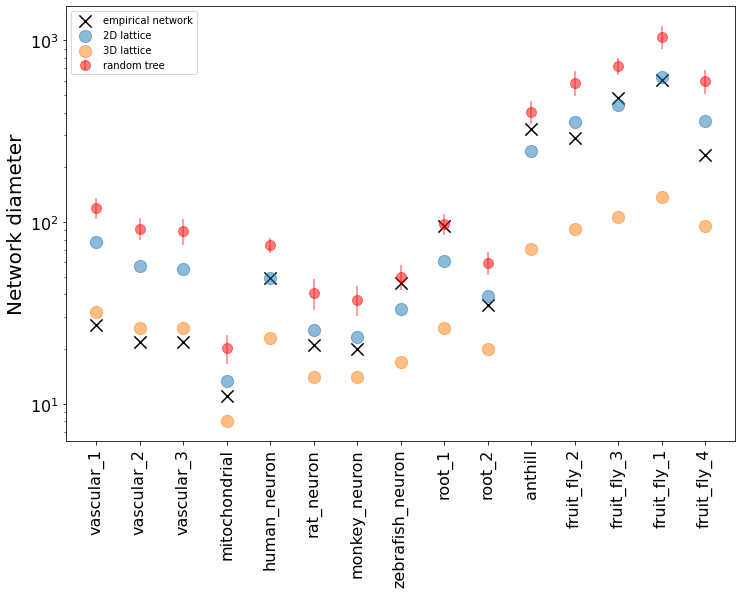

In [235]:
plt.figure(figsize=(12,8))
plt.scatter(diff_empirical_dict.keys(),diff_empirical_dict.values(),label='empirical network',marker='x',s=150,color='black')
plt.errorbar(diff_tree_dict.keys(),diff_tree_dict.values(),yerr =diff_tree_std_dict.values(), label='random tree',linestyle='None',marker='.',ms=20,alpha=0.5,color='red')
#plt.scatter(diff_lattice_1D_dict.keys(),diff_lattice_1D_dict.values(),label='1D chain')
plt.scatter(diff_lattice_2D_dict.keys(),diff_lattice_2D_dict.values(),label='2D lattice',s=150,alpha=0.5)
plt.scatter(diff_lattice_3D_dict.keys(),diff_lattice_3D_dict.values(),label='3D lattice',s=150,alpha=0.5)
plt.legend(loc='upper left')
plt.ylabel('Network diameter')
plt.xticks(rotation=90)
plt.yscale('log')
#plt.yticks([10,10**2])
#plt.ylim(1,10000)
#plt.yscale('log')

In [237]:
nx.enumerate_all_cliques(G)

<generator object enumerate_all_cliques at 0x7fcbc6d26200>

In [254]:
name_list =['vascular_1', 'vascular_2', 'vascular_3', 'mitochondrial','human_neuron', 'rat_neuron', 'monkey_neuron', 'zebrafish_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_2', 'fruit_fly_3',
       'fruit_fly_1', 'fruit_fly_4']
clique_count_dict = {}
for name in name_list:
    print('******',name)
    network_measures_dict = {}
    path_source = '../1. data/3. final_data/'
    link_paths = pd.read_csv(path_source +name + '.paths.csv',index_col=[0])
    path_bodyid_list = link_paths[['path_id','bodyId_pre','bodyId_post']].drop_duplicates().values.tolist()
    G = nx.Graph()
    path_bodyid_dict = {}  
    bodyid_path_dict = {}
    for path_bodyid in path_bodyid_list:
        path_bodyid_dict[path_bodyid[0]] =  (path_bodyid[1],path_bodyid[2])
        bodyid_path_dict[(path_bodyid[1],path_bodyid[2])] = path_bodyid[0]
        bodyid_path_dict[(path_bodyid[2],path_bodyid[1])] = path_bodyid[0] 
    for path_id,bodyid_edge in path_bodyid_dict.items():
        #print(path_id,bodyid_edge)
        G.add_edge(bodyid_edge[0],bodyid_edge[1])
        
    clique_list = [len(s) for s in nx.enumerate_all_cliques(G) if len(s) > 2]
    clique_count_dict[name] = {}
    if len(clique_list) != 0:
        for i in range(3,np.max(clique_list)+1):
            clique_count_dict[name][i] = clique_list.count(i)
    else:
        clique_count_dict[name][3] = 0

****** vascular_1
****** vascular_2
****** vascular_3
****** mitochondrial
****** human_neuron
****** rat_neuron
****** monkey_neuron
****** zebrafish_neuron
****** root_1
****** root_2
****** anthill
****** fruit_fly_2
****** fruit_fly_3
****** fruit_fly_1
****** fruit_fly_4


In [261]:
 clique_count_dict

{'vascular_1': {3: 32},
 'vascular_2': {3: 19},
 'vascular_3': {3: 23},
 'mitochondrial': {3: 3},
 'human_neuron': {3: 0},
 'rat_neuron': {3: 0},
 'monkey_neuron': {3: 0},
 'zebrafish_neuron': {3: 0},
 'root_1': {3: 0},
 'root_2': {3: 0},
 'anthill': {3: 0},
 'fruit_fly_2': {3: 70},
 'fruit_fly_3': {3: 16},
 'fruit_fly_1': {3: 232},
 'fruit_fly_4': {3: 330}}